In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

In [27]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

In [28]:
df = pd.read_csv("C:\\Users\\elect\\Desktop\\ds_cars_proj\\Transformed_data\\Cleaned_data.csv")

In [29]:
df.head(4)

,Car Model,Condition,Mileage,Price (USD),Monthly Payment,Dealer Name,Year,brand,Mileage_mi,Condition_car
0,2023 BMW M2 Base,Used,2496,63000.0,1184.0,Murgado Ford of Chicago,2023,BMW,2496.0,Used
1,2020 Dodge Charger SXT,Used,98302,14995.0,282.0,Blue Sky Auto Sales - Brighton Park,2020,Dodge,98302.0,Used
2,2016 Scion iM Base,Used,72040,12690.0,239.0,Mcgrath Evanston Subaru,2016,Scion,72040.0,Used
3,2022 Volvo XC60 Recharge Plug-In Hybrid T8 Ins...,Used,31580,38998.0,733.0,CarMax Birmingham,2022,Volvo,31580.0,Used


In [50]:

from sklearn.impute import SimpleImputer

# Selecting all brands that haven't NaN values 
brands_cat1 = ['BMW', 'Dodge', 'Volvo', 'Mitsubishi', 'Chevrolet','Toyota', 'Lexus', 'Lincoln', 'Cadillac', 'Audi', 'Ferrari','INFINITI', 'Ford', 'Genesis', 'Jeep', 'Land Rover', 'Porsche','Kia', 'Nissan', 'Mercedes-Benz', 'Volkswagen', 'Hyundai', 'Acura','Subaru', 'RAM', 'Mazda', 'Honda', 'Alfa Romeo',  'GMC','Buick', 'MINI', 'Bentley',  'Chrysler', 'Lotus','Maserati','Aston Martin', 'Rolls-Royce'] 
brand_dataframes1 = {brand: df[df['brand'] == brand] for brand in brands_cat1}

#to store the score for each brand
brand_scores1 = []

for brand, brand_dataframe in brand_dataframes1.items():
    le = LabelEncoder()
    scaler = StandardScaler()
    imputer = SimpleImputer(strategy='mean')
    brand_dataframe['Condition_car_encoded'] = le.fit_transform(brand_dataframe['Condition_car'])

    X = brand_dataframe.drop(columns=['Price (USD)', 'Car Model', 'Condition', 'Mileage', 'Dealer Name', 'brand', 'Condition_car','Monthly Payment'])
    Y = brand_dataframe['Price (USD)']

    X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

    X_train_imputed = pd.DataFrame(imputer.fit_transform(X_train), columns=X_train.columns)
    X_test_imputed = pd.DataFrame(imputer.transform(X_test), columns=X_test.columns)

    X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train_imputed), columns=X_train.columns)
    X_test_scaled = pd.DataFrame(scaler.transform(X_test_imputed), columns=X_test.columns)

    # Train data final
    train_data_scaled = X_train_scaled.join(y_train.reset_index(drop=True))

    reg = LinearRegression()
    reg.fit(X_train_scaled, y_train)

    brand_scores1.append(reg.score(X_test_scaled, y_test))


C:\Users\elect\AppData\Local\Temp\ipykernel_21228\1211481930.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  brand_dataframe['Condition_car_encoded'] = le.fit_transform(brand_dataframe['Condition_car'])
C:\Users\elect\AppData\Local\Temp\ipykernel_21228\1211481930.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  brand_dataframe['Condition_car_encoded'] = le.fit_transform(brand_dataframe['Condition_car'])
C:\Users\elect\AppData\Local\Temp\ipykernel_21228\1211481930.py:14: SettingWithCopyWarning: 
A v

In [51]:
np.mean(brand_scores1)

np.float64(0.3619681711312522)

In [45]:

from sklearn.impute import SimpleImputer

# Selecting all brands where Year and Condition_car don't appear in the heatmap
brands_cat2 = ['Scion', 'Tesla', 'Jaguar', 'Hummer', 'Lamborghini', 'FIAT', 'Pontiac', 'McLaren', 'Mercury', 'Saab', 'Plymouth', 'Triumph']
brand_dataframes2 = {brand: df[df['brand'] == brand] for brand in brands_cat2}
# to store the score for each brand
brand_scores2 = []

for brand, brand_dataframe in brand_dataframes2.items():
    try:
        if len(brand_dataframe) < 2:
            print(f"Not enough data for brand: {brand}")
            brand_scores2.append(np.nan)
            continue

        le = LabelEncoder()
        scaler = StandardScaler()
        imputer = SimpleImputer(strategy='mean')
        brand_dataframe['Condition_car_encoded'] = le.fit_transform(brand_dataframe['Condition_car'])

        X = brand_dataframe.drop(columns=['Price (USD)', 'Car Model', 'Condition', 'Mileage', 'Dealer Name', 'brand', 'Condition_car', 'Year', 'Condition_car','Monthly Payment'])
        Y = brand_dataframe['Price (USD)']

        X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

        X_train_imputed = pd.DataFrame(imputer.fit_transform(X_train), columns=X_train.columns)
        X_test_imputed = pd.DataFrame(imputer.transform(X_test), columns=X_test.columns)

        X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train_imputed), columns=X_train.columns)
        X_test_scaled = pd.DataFrame(scaler.transform(X_test_imputed), columns=X_test.columns)

        # Train data final
        train_data_scaled = X_train_scaled.join(y_train.reset_index(drop=True))

        reg = LinearRegression()
        reg.fit(X_train_scaled, y_train)

        brand_scores2.append(reg.score(X_test_scaled, y_test))
    except Exception as e:
        print(f"Error processing brand {brand}: {e}")
        brand_scores2.append(np.nan)


C:\Users\elect\AppData\Local\Temp\ipykernel_21228\1835416669.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  brand_dataframe['Condition_car_encoded'] = le.fit_transform(brand_dataframe['Condition_car'])
C:\Users\elect\AppData\Local\Temp\ipykernel_21228\1835416669.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  brand_dataframe['Condition_car_encoded'] = le.fit_transform(brand_dataframe['Condition_car'])
C:\Users\elect\AppData\Local\Temp\ipykernel_21228\1835416669.py:19: SettingWithCopyWarning: 
A v

In [46]:
np.mean(brand_scores2)

np.float64(nan)

In [34]:
for brand in brands_cat2:
    print(df[df['brand'] == brand])

                                Car Model Condition Mileage  Price (USD)  \
2                      2016 Scion iM Base      Used   72040      12690.0   
400                    2014 Scion tC Base      Used   41804      17985.0   
4321                   2011 Scion tC Base      Used  106958       7495.0   
6243     2012 Scion xB Release Series 9.0      Used  113378       8151.0   
7516                 2016 Scion FR-S Base      Used  154265      10995.0   
8679     2010 Scion xB Release Series 7.0      Used  177241       7450.0   
8783  2010 Scion xD Base 4dr Hatchback 4A      Used   69721       6995.0   
8798                   2014 Scion xB Base      Used  142000       5900.0   
8809                   2008 Scion xB Base      Used   60153       8990.0   
8934     2015 Scion tC Release Series 9.0      Used   95876      10810.0   
8996                   2014 Scion tC Base      Used   77395      11928.0   

      Monthly Payment                  Dealer Name  Year  brand  Mileage_mi  \
2       

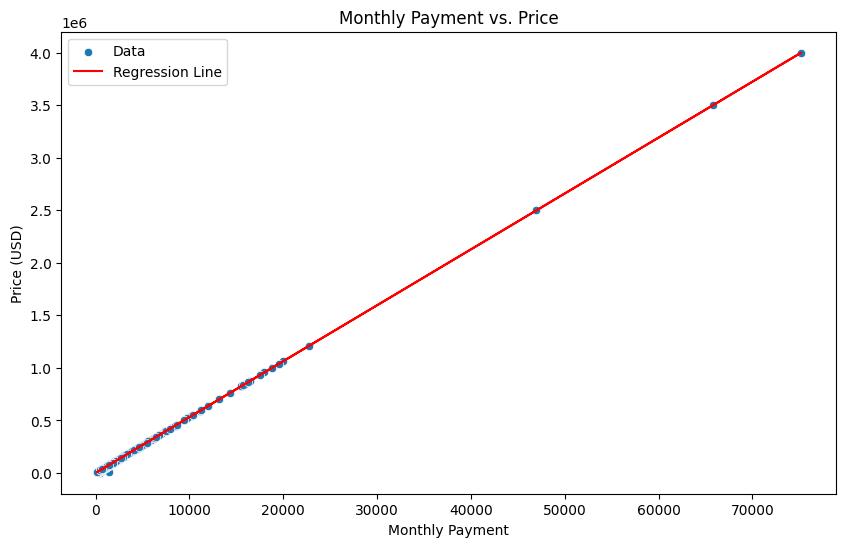

Coefficient: 53.199825638372275
Intercept: -8.957948985975236


In [ ]:
# Prepare the data
X = df[['Monthly Payment']].dropna()  # Use only non-null values
y = df['Price (USD)'].dropna()

# Adjust dimensions
X = X.values.reshape(-1, 1)
y = y.values

# Create and fit the linear regression model
model = LinearRegression()
model.fit(X, y)

# Predict values
y_pred = model.predict(X)

# Plot the data and the regression line
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Monthly Payment', y='Price (USD)', label='Data')
plt.plot(X, y_pred, color='red', label='Regression Line')
plt.title('Monthly Payment vs. Price')
plt.legend()
plt.show()

# Display the coefficients
print(f"Coefficient: {model.coef_[0]}")
print(f"Intercept: {model.intercept_}")

In [36]:
df.columns

Index(['Car Model', 'Condition', 'Mileage', 'Price (USD)', 'Monthly Payment',
       'Dealer Name', 'Year', 'brand', 'Mileage_mi', 'Condition_car'],
      dtype='object')

In [43]:
from sklearn.ensemble import RandomForestRegressor

# Selecting all brands that haven't NaN values 
brands_cat1 = ['BMW', 'Dodge', 'Volvo', 'Mitsubishi', 'Chevrolet','Toyota', 'Lexus', 'Lincoln', 'Cadillac', 'Audi', 'Ferrari','INFINITI', 'Ford', 'Genesis', 'Jeep', 'Land Rover', 'Porsche','Kia', 'Nissan', 'Mercedes-Benz', 'Volkswagen', 'Hyundai', 'Acura','Subaru', 'RAM', 'Mazda', 'Honda', 'Alfa Romeo',  'GMC','Buick', 'MINI', 'Bentley',  'Chrysler', 'Lotus','Maserati','Aston Martin', 'Rolls-Royce'] 
brand_dataframes1 = {brand: df[df['brand'] == brand] for brand in brands_cat1}

#to store the score for each brand
brand_scores1 = []

for brand, brand_dataframe in brand_dataframes1.items():
    le = LabelEncoder()
    scaler = StandardScaler()
    imputer = SimpleImputer(strategy='mean')
    brand_dataframe['Condition_car_encoded'] = le.fit_transform(brand_dataframe['Condition_car'])

    X = brand_dataframe.drop(columns=['Price (USD)', 'Car Model', 'Condition', 'Mileage', 'Dealer Name', 'brand', 'Condition_car','Monthly Payment'])
    Y = brand_dataframe['Price (USD)']

    X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

    X_train_imputed = pd.DataFrame(imputer.fit_transform(X_train), columns=X_train.columns)
    X_test_imputed = pd.DataFrame(imputer.transform(X_test), columns=X_test.columns)

    X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train_imputed), columns=X_train.columns)
    X_test_scaled = pd.DataFrame(scaler.transform(X_test_imputed), columns=X_test.columns)

    # Train data final
    train_data_scaled = X_train_scaled.join(y_train.reset_index(drop=True))

    reg = RandomForestRegressor()
    reg.fit(X_train_scaled, y_train)

    brand_scores1.append(reg.score(X_test_scaled, y_test))


C:\Users\elect\AppData\Local\Temp\ipykernel_21228\4169275628.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  brand_dataframe['Condition_car_encoded'] = le.fit_transform(brand_dataframe['Condition_car'])
C:\Users\elect\AppData\Local\Temp\ipykernel_21228\4169275628.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  brand_dataframe['Condition_car_encoded'] = le.fit_transform(brand_dataframe['Condition_car'])
C:\Users\elect\AppData\Local\Temp\ipykernel_21228\4169275628.py:14: SettingWithCopyWarning: 
A v

In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import KNNImputer
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

# Assuming df is your DataFrame containing the data
brands_cat1 = ['BMW', 'Dodge', 'Volvo', 'Mitsubishi', 'Chevrolet', 'Toyota', 'Lexus', 
               'Lincoln', 'Cadillac', 'Audi', 'Ferrari', 'INFINITI', 'Ford', 'Genesis', 
               'Jeep', 'Land Rover', 'Porsche', 'Kia', 'Nissan', 'Mercedes-Benz', 
               'Volkswagen', 'Hyundai', 'Acura', 'Subaru', 'RAM', 'Mazda', 'Honda', 
               'Alfa Romeo', 'GMC', 'Buick', 'MINI', 'Bentley', 'Chrysler', 'Lotus', 
               'Maserati', 'Aston Martin', 'Rolls-Royce']

brand_dataframes1 = {brand: df[df['brand'] == brand] for brand in brands_cat1}

# Store scores and metrics
brand_scores1 = []
metrics_results = []

for brand, brand_dataframe in brand_dataframes1.items():
    # Define features and target
    X = brand_dataframe.drop(columns=['Price (USD)', 'Car Model', 'Condition', 'Mileage', 'Dealer Name', 'brand', 'Monthly Payment'])
    Y = brand_dataframe['Price (USD)']

    # Separate numerical and categorical variables
    num_features = X.select_dtypes(include=['number']).columns.tolist()
    cat_features = X.select_dtypes(include=['object']).columns.tolist()

    # Preprocessing: One-Hot Encoding + Standardization + Imputation
    num_transformer = Pipeline(steps=[
        ('imputer', KNNImputer(n_neighbors=5)),  # Advanced imputation
        ('scaler', StandardScaler())  # Normalization
    ])
    
    cat_transformer = Pipeline(steps=[
        ('encoder', OneHotEncoder(handle_unknown='ignore'))  # One-Hot Encoding
    ])
    
    preprocessor = ColumnTransformer(transformers=[
        ('num', num_transformer, num_features),
        ('cat', cat_transformer, cat_features)
    ])
    
    # Split the data
    X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

    # Create the pipeline with RandomForest
    model = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('regressor', RandomForestRegressor(n_estimators=300, max_depth=11, random_state=42))
    ])
    
    # Train the model
    model.fit(X_train, y_train)
    
    # Predictions
    y_pred = model.predict(X_test)
    
    # Evaluation
    r2 = r2_score(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    
    brand_scores1.append(r2)
    metrics_results.append({'brand': brand, 'R2': r2, 'MAE': mae, 'RMSE': rmse})

# Summary of performances
metrics_df = pd.DataFrame(metrics_results)
print(metrics_df.sort_values(by='R2', ascending=False))


            brand        R2            MAE           RMSE
11       INFINITI  0.903325    5097.924319    7799.278893
30           MINI  0.901957    2555.618367    3472.886191
36    Rolls-Royce  0.899157   21996.008667   24218.539678
31        Bentley  0.886858   18992.556667   25987.163507
32       Chrysler  0.884953    3666.386879    4732.060131
20     Volkswagen  0.849251    4097.634362    4973.360152
34       Maserati  0.844253   15676.666667   16887.442120
6           Lexus  0.776808    5976.601203   10100.320142
2           Volvo  0.775342    5359.988265    7614.451329
15     Land Rover  0.757234   17389.017024   21411.296146
35   Aston Martin  0.748034   38474.838524   43966.735445
33          Lotus  0.745172    8618.897963   11260.106235
23         Subaru  0.679576    2792.518326    3692.888817
26          Honda  0.675065    4982.492297    6268.303377
25          Mazda  0.638845    5496.016187    7464.751465
0             BMW  0.622155   14632.713274   21653.105891
7         Linc

In [65]:
print(metrics_df[metrics_df['R2']>0.6]['brand'])

0              BMW
2            Volvo
6            Lexus
7          Lincoln
11        INFINITI
15      Land Rover
20      Volkswagen
21         Hyundai
23          Subaru
25           Mazda
26           Honda
30            MINI
31         Bentley
32        Chrysler
33           Lotus
34        Maserati
35    Aston Martin
36     Rolls-Royce
Name: brand, dtype: object


In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import KNNImputer
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

# Assuming df is your DataFrame containing the data
brands_cat1 = ['BMW', 'Volvo', 'Lexus', 'Lincoln', 'INFINITI', 'Land Rover', 'Volkswagen', 'Hyundai', 'Subaru', 'Mazda', 'Honda', 'MINI', 'Bentley', 'Chrysler', 'Lotus', 'Maserati', 'Aston Martin', 'Rolls-Royce']

brand_dataframes1 = {brand: df[df['brand'] == brand] for brand in brands_cat1}

# Store scores and metrics
brand_scores1 = []
metrics_results = []

for brand, brand_dataframe in brand_dataframes1.items():
    # Define features and target
    X = brand_dataframe.drop(columns=['Price (USD)', 'Car Model', 'Condition', 'Mileage', 'Dealer Name', 'brand', 'Monthly Payment'])
    Y = brand_dataframe['Price (USD)']

    # Separate numerical and categorical variables
    num_features = X.select_dtypes(include=['number']).columns.tolist()
    cat_features = X.select_dtypes(include=['object']).columns.tolist()

    # Preprocessing: One-Hot Encoding + Standardization + Imputation
    num_transformer = Pipeline(steps=[
        ('imputer', KNNImputer(n_neighbors=5)),  # Advanced imputation
        ('scaler', StandardScaler())  # Normalization
    ])
    
    cat_transformer = Pipeline(steps=[
        ('encoder', OneHotEncoder(handle_unknown='ignore'))  # One-Hot Encoding
    ])
    
    preprocessor = ColumnTransformer(transformers=[
        ('num', num_transformer, num_features),
        ('cat', cat_transformer, cat_features)
    ])
    
    # Split the data
    X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

    # Create the pipeline with RandomForest
    model = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('regressor', RandomForestRegressor(n_estimators=300, max_depth=11, random_state=42))
    ])
    
    # Train the model
    model.fit(X_train, y_train)
    
    # Predictions
    y_pred = model.predict(X_test)
    
    # Evaluation
    r2 = r2_score(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    
    brand_scores1.append(r2)
    metrics_results.append({'brand': brand, 'R2': r2, 'MAE': mae, 'RMSE': rmse})

# Summary of performances
metrics_df = pd.DataFrame(metrics_results)
print(metrics_df.sort_values(by='R2', ascending=False))


           brand        R2           MAE          RMSE
4       INFINITI  0.903325   5097.924319   7799.278893
11          MINI  0.901957   2555.618367   3472.886191
17   Rolls-Royce  0.899157  21996.008667  24218.539678
12       Bentley  0.886858  18992.556667  25987.163507
13      Chrysler  0.884953   3666.386879   4732.060131
6     Volkswagen  0.849251   4097.634362   4973.360152
15      Maserati  0.844253  15676.666667  16887.442120
2          Lexus  0.776808   5976.601203  10100.320142
1          Volvo  0.775342   5359.988265   7614.451329
5     Land Rover  0.757234  17389.017024  21411.296146
16  Aston Martin  0.748034  38474.838524  43966.735445
14         Lotus  0.745172   8618.897963  11260.106235
8         Subaru  0.679576   2792.518326   3692.888817
10         Honda  0.675065   4982.492297   6268.303377
9          Mazda  0.638845   5496.016187   7464.751465
0            BMW  0.622155  14632.713274  21653.105891
3        Lincoln  0.606308  10939.499386  14253.215518
7        H

In [54]:
np.mean(brand_scores1)

np.float64(nan)

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9322 entries, 0 to 9321
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Car Model        9322 non-null   object 
 1   Condition        9310 non-null   object 
 2   Mileage          5204 non-null   object 
 3   Price (USD)      9322 non-null   float64
 4   Monthly Payment  9322 non-null   float64
 5   Dealer Name      9322 non-null   object 
 6   Year             9322 non-null   int64  
 7   brand            9322 non-null   object 
 8   Mileage_mi       5198 non-null   float64
 9   Condition_car    9322 non-null   object 
dtypes: float64(3), int64(1), object(6)
memory usage: 728.4+ KB


In [42]:
df.head(2)

,Car Model,Condition,Mileage,Price (USD),Monthly Payment,Dealer Name,Year,brand,Mileage_mi,Condition_car
0,2023 BMW M2 Base,Used,2496,63000.0,1184.0,Murgado Ford of Chicago,2023,BMW,2496.0,Used
1,2020 Dodge Charger SXT,Used,98302,14995.0,282.0,Blue Sky Auto Sales - Brighton Park,2020,Dodge,98302.0,Used
